<a href="https://colab.research.google.com/github/audivayasmin/KomputasiIntelegensia/blob/main/EndTermTask_KI_Shafiyah_Audiva_Yasmin_2106706880.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link dataset Waste Classification : https://www.kaggle.com/datasets/techsash/waste-classification-data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:06<00:00, 65.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [4]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN/"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/"

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2177.66it/s]


In [7]:
data.shape

(22564, 2)

In [8]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

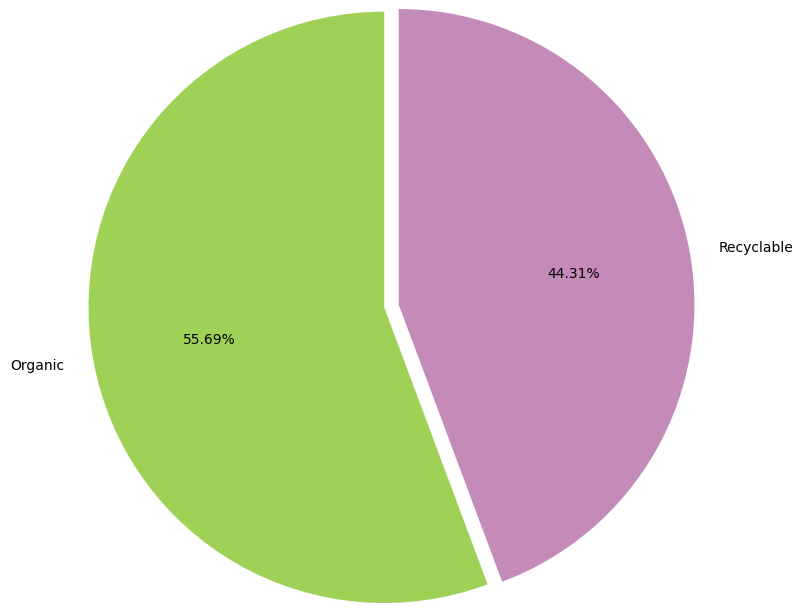

In [9]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

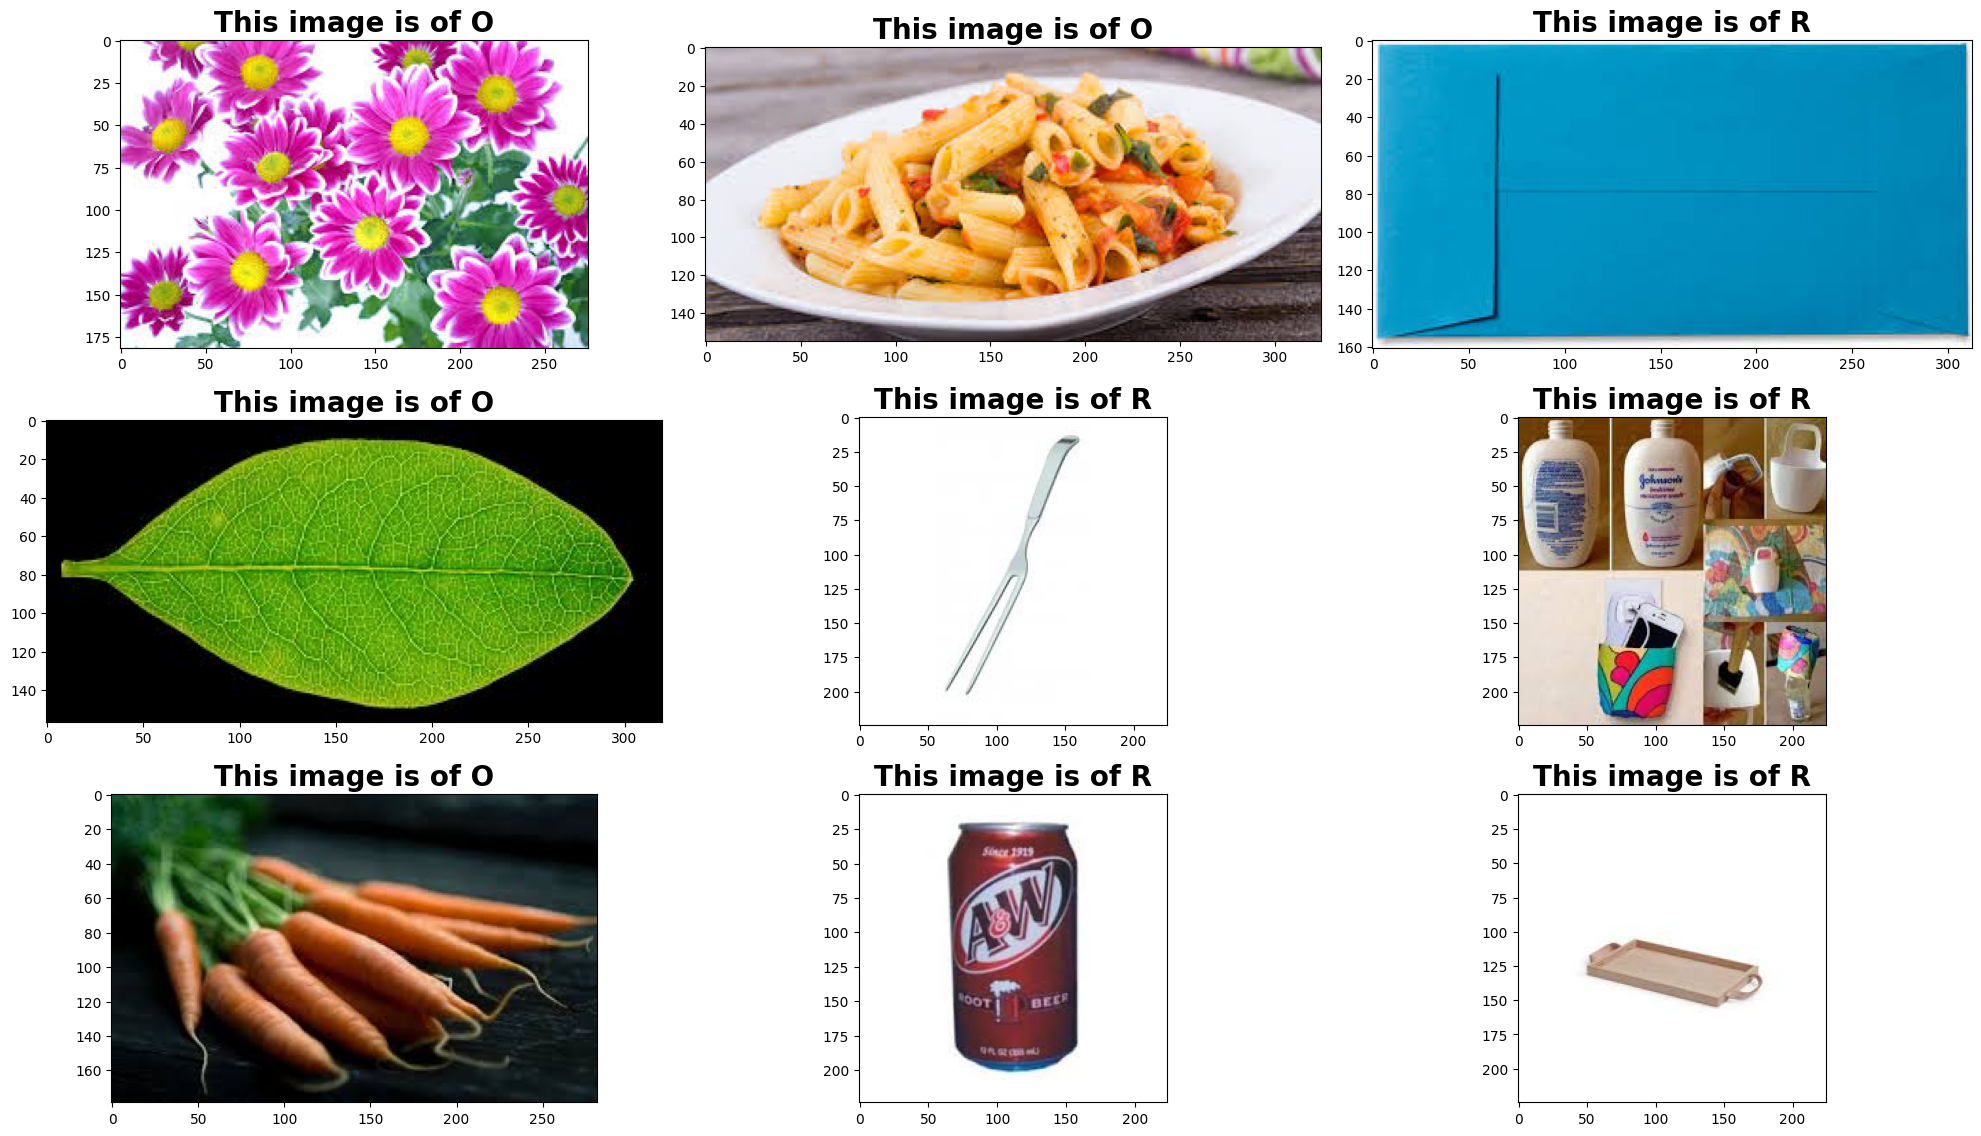

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [11]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


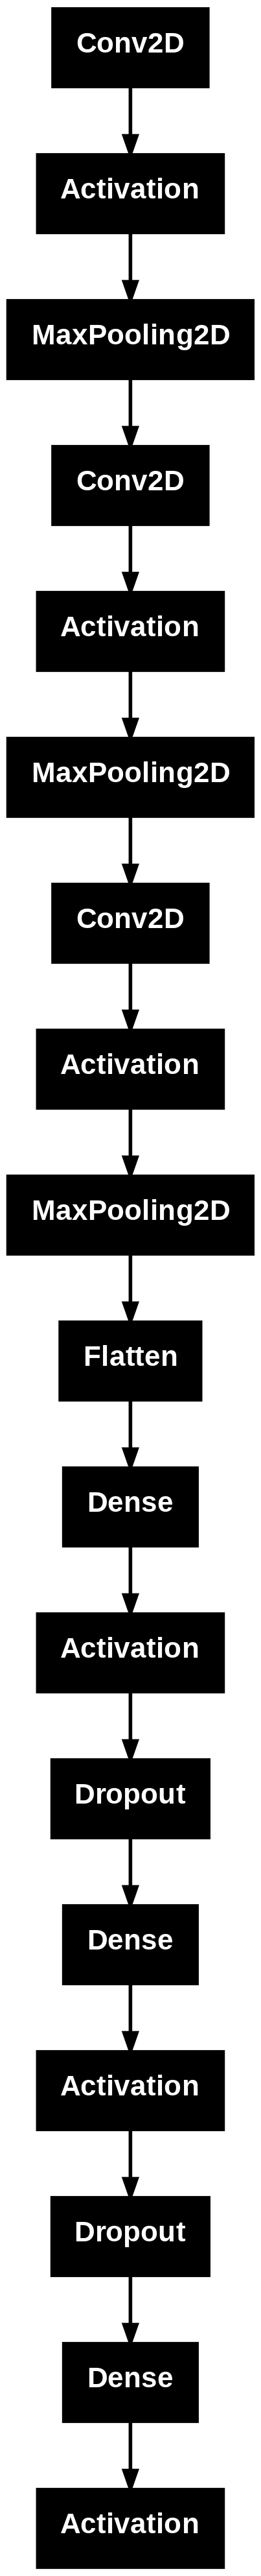

In [13]:
plot_model(model)

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
hist = model.fit(
        train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 104s 838ms/step - accuracy: 0.7156 - loss: 0.5931 - val_accuracy: 0.8532 - val_loss: 0.3740
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 54s 573ms/step - accuracy: 0.8222 - loss: 0.4209 - val_accuracy: 0.8687 - val_loss: 0.3276
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 588ms/step - accuracy: 0.8417 - loss: 0.3871 - val_accuracy: 0.8874 - val_loss: 0.3070
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 82s 587ms/step - accuracy: 0.8568 - loss: 0.3552 - val_accuracy: 0.8715 - val_loss: 0.3306
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 578ms/step - accuracy: 0.8730 - loss: 0.3200 - val_accuracy: 0.8858 - val_loss: 0.2867
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 56s 591ms/step - accuracy: 0.8820 - loss: 0.2977 - val_accuracy: 0.8874 - val_loss: 0.2944
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 574ms/step - accuracy: 0.8977 - loss: 0.2593 - val_accuracy: 0.9037 - val_loss: 0.2622
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 579ms/step - accuracy: 0.9187 - loss: 0.2141 - val_accuracy: 0.89

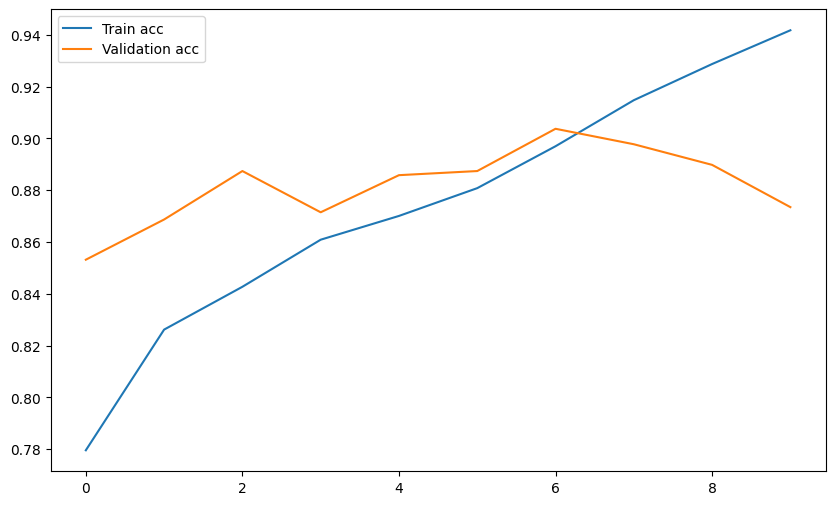

In [18]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

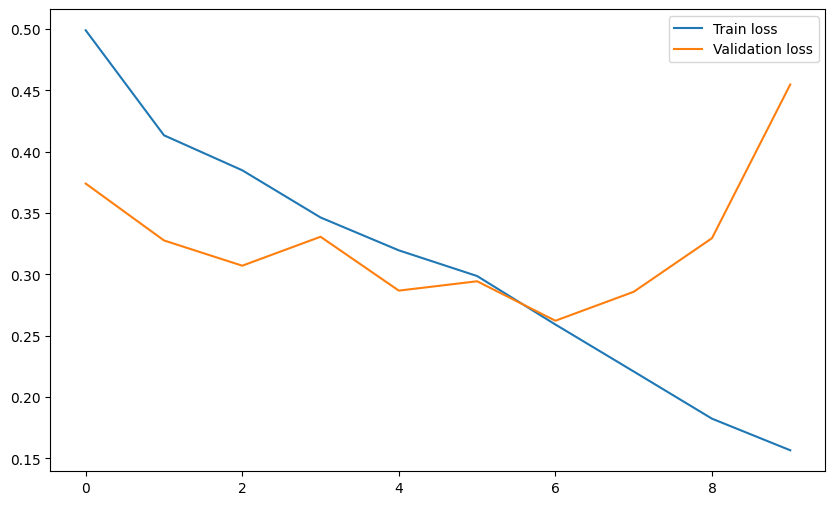

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [20]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
This image -> Organic


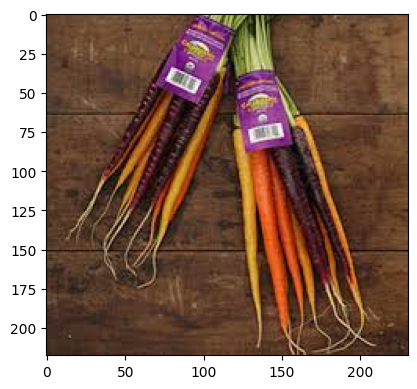

In [21]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)